This code takes the calculated periods and visible times and plots them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

***

# IMPORTANT, FILL IN PATH 

In [2]:
#Options: "SySs", "SyNe", "both"
system_type = "SyNe"

***

In [3]:
############## NOT THIS ONE ##############
if system_type == "SySs":
    
    path = "../results/SySs_results"
    name = "SySs"
    header = "SySs"
    
elif system_type == "SyNe":
    
    path = "../results/SyNe_results"
    name = "SyNe"
    header = "SyNe"
    
elif system_type == "both":
    
    path = "../results/SySs_SyNe_results"
    name = "SySs_and_SyNe"
    header = "SySs and SyNe"

***

In [4]:
# Load observed periods data
periods_obs = np.loadtxt('/STER/axelf/observations/periods.txt')

log_periods_obs = np.log10(periods_obs)

In [5]:
log_periods_data2Stage = np.loadtxt(path + '/twostage_results/2stage_log_periods')
weight_2stage          = np.loadtxt(path + '/twostage_results/2stage_weights')

In [6]:
print(len(weight_2stage[weight_2stage > 0]))

56863


In [7]:
alphas = [-1, -0.5, 0, 0.5, 1]

log_periods_dataClassics = []
weight_Classics = []
for i in range(len(alphas)):
    
    log_periods_dataClassics.append(np.loadtxt(path + '/classic_results/classic_log_periods' + str(alphas[i])))
    weight_Classics.append(np.loadtxt(path + '/classic_results/classic_weights' + str(alphas[i])))

In [8]:
alphas = [-1, -0.5, 0, 0.5, 1]

log_periods_dataUnstables = []
weight_Unstables = []
for i in range(len(alphas)):
    
    log_periods_dataUnstables.append(np.loadtxt(path + '/unstable_results/unstable_log_periods' + str(alphas[i])))
    weight_Unstables.append(np.loadtxt(path + '/unstable_results/unstable_weights' + str(alphas[i])))

In [9]:
gamma_values = [0.0, 0.5, 1.0]
beta_values = np.linspace(0.0, 1, 6)

log_periods_dataStables = []
weight_Stables = []
for g in range(len(gamma_values)):
    for b in range(len(beta_values)):
    
        log_periods_dataStables.append(np.loadtxt(path + '/stable_results/stable_log_periods_' + str(gamma_values[g]) + '_' + str(np.round(beta_values[b],2))))
        weight_Stables.append(np.loadtxt(path + '/stable_results/stable_weights_' + str(gamma_values[g]) + '_' + str(np.round(beta_values[b],2))))

In [10]:
# Function to plot Kernel Density Estimate (KDE)
def plot_kde(data, weight, color, linestyle, linewidth=2):

    kde = gaussian_kde(data, weights = weight)  # Generate the KDE for the data
    x_vals = np.linspace(0, 8, 500)  # Define the range for x-axis
    plt.plot(x_vals, kde(x_vals), color=color, linestyle=linestyle, linewidth=linewidth)  # Plot KDE

KeyboardInterrupt: 

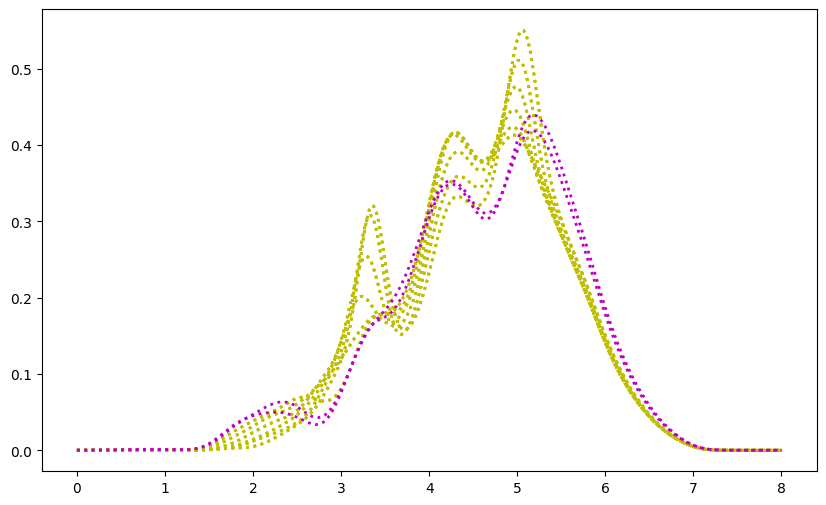

In [11]:
# Start figure
plt.figure(figsize=(10, 6))

# Loop through dataStables, log-transform and plot histogram
for ind in range(len(log_periods_dataStables)):
    if len(weight_Stables[ind][weight_Stables[ind] > 0]) and list(np.isfinite(weight_Stables[ind])).count(True) > 0:
        plot_kde(log_periods_dataStables[ind][np.isfinite(weight_Stables[ind]) & np.isfinite(log_periods_dataStables[ind])], weight_Stables[ind][np.isfinite(weight_Stables[ind]) & np.isfinite(log_periods_dataStables[ind])], color='y', linestyle=':', linewidth=2)  # Plot KDE for stable data

# Loop through dataUnstables, log-transform and plot histogram
for ind in range(len(log_periods_dataUnstables)):
    if len(log_periods_dataUnstables[ind]) > 1: 
        plot_kde(log_periods_dataUnstables[ind][np.isfinite(weight_Unstables[ind])], weight_Unstables[ind][np.isfinite(weight_Unstables[ind])], color='m', linestyle=':', linewidth=2)  # Plot KDE for stable data

# Plot KDE for each dataset in 'dataEnergys' after log-transforming periods
for ind in range(len(log_periods_dataClassics)):
    if len(log_periods_dataClassics[ind]) > 1: 
        plot_kde(log_periods_dataClassics[ind][np.isfinite(weight_Classics[ind])], weight_Classics[ind][np.isfinite(weight_Classics[ind])], color='r', linestyle='-.', linewidth=2)  # Plot KDE for classical data


# Log-transform two-stage data and plot the KDE
plot_kde(log_periods_data2Stage[np.isfinite(weight_2stage)], weight_2stage[np.isfinite(weight_2stage)], color='b', linestyle='-', linewidth=2)

# Log-transform observed periods and plot the KDE
plot_kde(log_periods_obs, None , color='k', linestyle='--', linewidth=2.5)

# Dummy points with matching linestyle
plt.plot(0, 0, c='k', ls='--', label='Observed', linewidth=2.5)  
plt.plot(0, 0, c='r', ls='-.', label='Classical', linewidth=2)  
plt.plot(0, 0, c='y', ls=':', label='Stable', linewidth=2)  
plt.plot(0, 0, c='m', ls=':', label='Unstable', linewidth=2)  
plt.plot(0, 0, c='b', ls='-', label='Two-stage', linewidth=2) 

plt.legend(loc='upper right', fontsize=18)  # Place legend in upper right corner

plt.xlim(0, 8)  # Set the limits for x-axis
plt.ylim(0, 1.9)

plt.title(header + ' weighted', size = 24)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)  # Add light dashed gridlines


plt.xlabel('log10(P) [days]', size = 18)
plt.ylabel('Density', size = 18)

#plt.show()

plt.savefig('../figures/' + name + '_weighted.png')